In [1131]:
import umap
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import StandardScaler
from scipy.stats import wasserstein_distance
from random import shuffle
import itertools
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [732]:
merged = pd.read_csv("merged_with_sentences.csv", delimiter="$", index_col=0)
merged = pd.read_csv("merged_with_sentences.csv", delimiter="$", index_col=0)
merged = merged.loc[~pd.isnull(merged.SMILES)].loc[~pd.isnull(merged.CID)]
#merged = merged.drop(columns=["ChemicalName", "Notes", "SMILES", "CID", "generated_deepnose_labels"])
merged.rename(columns={"Description": "raw_human",
                    "generated_human": "beautified_human",
                    "generated_w_labels": "true_labels",
                    "NEW_deepnose_sentences": "generated_deepnose", 
                    "few_shot_gen_human": "few_shot_beautified_human", 
                    "few_shot_gen_BoW":"few_shot_generated_labels"
                    }, inplace=True)

In [832]:
for cid in embeddings.CID.values:
    if not cid in merged.CID.values:
        print(cid)

6427078


In [1098]:
def process_csv(fpath):
    embeddings = pd.read_csv(fpath, delimiter="$")
    #embeddings = embeddings.drop(columns=['CAS', 'FLOATCID', 'SMILES', 'Notes',
    #                                      'testset', "ChemicalName", "generated_deepnose_labels"])
    embeddings.rename(columns={"Description": "HD",
                        "generated_human": "CHD",
                        "generated_w_labels": "CHL",
                        "NEW_deepnose_sentences": "CDL", 
                        "NEW_deepnose_labels": "DL",
                        "BagOfWords": "HL",
                        "zero_shot": "S+ZS",
                        "few_shot_human": "S+HD", 
                        "few_shot_gen_human": "S+CHD", 
                        "few_shot_gen_BoW": "S+CHL"
                        }, inplace=True)
    for col in ["CHD", "HD", "HL", "CHL", "CDL", "S+ZS", "S+HD", "S+CHD", "S+CHL"]:
        try:
            embeddings[col] = embeddings[col].apply(lambda row: np.array(row[1:-1].split(",")).astype(np.double))
        except:
            embeddings[col] = embeddings[col].apply(lambda row: np.array(row[1:-1].split()).astype(np.double))
    embeddings.head()
    return embeddings

In [1108]:
base_df = pd.read_csv("base_MiniLM_embeddings.csv", delimiter="$")

In [776]:
embeddings = pd.read_csv("all-MiniLM-L12-v1_testset_only.csv", delimiter="$")
embeddings = embeddings.drop(columns=['Unnamed: 0.1', 'Unnamed: 0', 'CAS', 'FLOATCID', 'SMILES', 'Notes',
                                      'testset', "ChemicalName", "generated_deepnose_labels"])
embeddings.rename(columns={"Description": "HD",
                    "generated_human": "CHD",
                    "generated_w_labels": "CHL",
                    "NEW_deepnose_sentences": "CDL", 
                    "NEW_deepnose_labels": "DL",
                    "BagOfWords": "HL",
                    "zero_shot": "S+ZS",
                    "few_shot_human": "S+HD", 
                    "few_shot_gen_human": "S+CHD", 
                    "few_shot_gen_BoW": "S+CHL"
                    }, inplace=True)
for col in ["CHD", "HD", "HL", "CHL", "CDL", "S+ZS", "S+HD", "S+CHD", "S+CHL"]:
    embeddings[col] = embeddings[col].apply(lambda row: np.array(row[1:-1].split(",")).astype(np.double))
embeddings.head()

,Dataset,HD,HL,CHD,CHL,S+HD,S+ZS,S+CHL,S+CHD,CDL,DL,CID
0,arctander,"[-0.013342222198843956, -0.05667724832892418, ...","[-0.051845747977495193, -0.09359131753444672, ...","[-0.03183460608124733, -0.07829659432172775, -...","[-0.04133530333638191, -0.024511735886335373, ...","[-0.06547325849533081, -0.07263335585594177, -...","[-0.049892570823431015, -0.06763017922639847, ...","[-0.0461110919713974, -0.051538679748773575, 0...","[-0.056725598871707916, -0.06491633504629135, ...","[-0.0493725910782814, -0.06522655487060547, 0....","[-0.05714964494109154, -0.11167702823877335, -...",177
1,arctander,"[0.006313520949333906, -0.043691929429769516, ...","[-0.013578874990344048, -0.10132990032434464, ...","[-0.02033909596502781, -0.03899193927645683, -...","[0.02975395694375038, -0.056098971515893936, 0...","[-0.10323081910610199, -0.07645200192928314, 0...","[-0.0508001409471035, -0.07812013477087021, -0...","[-0.06634888052940369, -0.09018544852733612, -...","[-0.05844784900546074, -0.10896919667720795, -...","[-0.048580385744571686, -0.05882202833890915, ...","[-0.007249018177390099, -0.08538425713777542, ...",5367767
2,arctander,"[-0.028407525271177292, -0.00898791290819645, ...","[-0.051845747977495193, -0.09359131753444672, ...","[-0.02029385231435299, -0.024849146604537964, ...","[-0.03104584291577339, -0.033850956708192825, ...","[0.01022134069353342, -0.019609879702329636, 0...","[-0.029750660061836243, -0.05332590267062187, ...","[-0.04999538138508797, -0.09588500112295151, -...","[0.03603452444076538, -0.044704411178827286, 0...","[-0.05063314363360405, -0.08529982715845108, -...","[-0.0342794694006443, -0.08330562710762024, -0...",66929
3,arctander,"[-0.04205409809947014, -0.028651226311922073, ...","[-0.029782548546791077, 0.0022786431945860386,...","[-0.0059026372618973255, 0.019237499684095383,...","[-0.08869478851556778, -0.08887869864702225, -...","[-0.05652674660086632, -0.0689472034573555, 0....","[0.003989254590123892, -0.059774793684482574, ...","[-0.07243748009204865, -0.03002995252609253, -...","[-0.06447581946849823, -0.04561428353190422, -...","[-0.0638122633099556, -0.06151122227311134, -0...","[-0.04447728767991066, -0.0664059966802597, -0...",176
4,arctander,"[-0.04571453109383583, -0.021429728716611862, ...","[-0.0502692386507988, -0.061211276799440384, -...","[-0.0435464084148407, -0.04248623549938202, -0...","[-0.03570402413606644, -0.019359569996595383, ...","[-0.06960756331682205, -0.12184157222509384, -...","[-0.07424653321504593, -0.08868424594402313, 0...","[-0.05685797333717346, -0.01621338725090027, -...","[-0.08794108778238297, -0.06536997854709625, -...","[-0.0382036454975605, -0.09678982943296432, 0....","[-0.04342402145266533, -0.08497423678636551, -...",31361


In [777]:
plot_cols = ["CHD", "HD", "HL", "CHL", "CDL", "S+ZS", "S+HD", "S+CHD", "S+CHL"]

In [1183]:
scores, scores_shuff = get_scores(base_df, "arctander", "goodscents")
for k in scores.keys():
    print(f"{k}: {scores[k].mean()}, shuff: {scores_shuff[k].mean()}")

0.3072916666666667
0.078125
0.2916666666666667
0.4010416666666667
0.6145833333333334
0.5677083333333334
0.203125
0.5104166666666666
0.65625
CHD: 0.581638567461435, shuff: 0.5742562760202791
HD: 0.34401848227664017, shuff: 0.33817882613649214
HL: 0.5811365870043407, shuff: 0.5733810793006003
CHL: 0.569486945662213, shuff: 0.5607460886560481
CDL: 0.5788083895774273, shuff: 0.5777607703842285
S+ZS: 0.5988124596272528, shuff: 0.5844490171956707
S+HD: 0.4167476228485596, shuff: 0.4049752102502596
S+CHD: 0.6784883228418153, shuff: 0.6684731749097896
S+CHL: 0.6118588911736836, shuff: 0.6034445695313121


In [1216]:
overlap_save = overlap
ds1, ds2 = "arctander", "goodscents"
df1 = base_embed.loc[base_embed.Dataset == ds1]
df2 = base_embed.loc[base_embed.Dataset == ds2]
cids1 = set(df1.CID.to_list())
cids2 = set(df2.CID.to_list())
df1 = df1.loc[base_embed.CID.isin(overlap_save)].sort_values(by=["CID"])
df2 = df2.loc[base_embed.CID.isin(overlap_save)].sort_values(by=["CID"])

v1 = np.stack(df1["CHD"].values[0:2])
v2 = np.stack(df2["CHD"].values[0:2])
#print(v1)
#np.random.shuffle(v1)
#print(v1)
print(np.diag(cosine_similarity(v1, v2)).mean())

0.5877204578505081


In [1205]:
v1

array([[-0.09047143, -0.03694989, -0.05962747, ...,  0.04499248,
         0.05280416,  0.02467039],
       [-0.01728987,  0.01053051, -0.04330887, ...,  0.02922958,
        -0.02179674, -0.00045381],
       [-0.00040335, -0.01559616, -0.02410127, ...,  0.01030383,
         0.06600238,  0.02389251],
       ...,
       [-0.05148059,  0.02813064, -0.00152788, ...,  0.02540932,
         0.04340007,  0.0331225 ],
       [-0.01396401,  0.03245307, -0.02730933, ...,  0.10129982,
         0.11606445, -0.00473413],
       [-0.04234798, -0.03745278,  0.00138763, ...,  0.02248739,
         0.06051671,  0.00462772]], shape=(1065, 384))

In [1217]:
def get_scores(embeddings, ds1, ds2):
    df1 = embeddings.loc[embeddings.Dataset == ds1]
    df2 = embeddings.loc[embeddings.Dataset == ds2]
    cids1 = set(df1.CID.to_list())
    cids2 = set(df2.CID.to_list())
    overlap = list(cids1.intersection(cids2))
    df1 = df1.loc[embeddings.CID.isin(overlap)].sort_values(by=["CID"])
    df2 = df2.loc[embeddings.CID.isin(overlap)].sort_values(by=["CID"])
    
    scores = {}
    for col in plot_cols:
        scores[col] = np.diag(cosine_similarity(np.stack(df1[col].values), np.stack(df2[col].values)))

    scores_shuff = {}

    for col in plot_cols:
        v1 = np.stack(df1[col].values)
        v2 = np.stack(df2[col].values)
        np.random.shuffle(v1)
        #np.random.shuffle(v2)
        scores_shuff[col] = np.diag(cosine_similarity(v1, v2))
    return scores, scores_shuff

scores, scores_shuff = get_scores(base_embed, "arctander", "goodscents")
for k in scores.keys():
    print(f"{k}: {scores[k].mean()}, shuff: {scores_shuff[k].mean()}")

CHD: 0.581638567461435, shuff: 0.5766029303153104
HD: 0.34401848227664017, shuff: 0.340507684092902
HL: 0.5811365870043407, shuff: 0.5732128721766775
CHL: 0.569486945662213, shuff: 0.5566185248247275
CDL: 0.5788083895774273, shuff: 0.5777774247154082
S+ZS: 0.5988124596272528, shuff: 0.5807632642383157
S+HD: 0.4167476228485596, shuff: 0.40209894322272244
S+CHD: 0.6784883228418153, shuff: 0.6716040539582204
S+CHL: 0.6118588911736836, shuff: 0.604182422245055


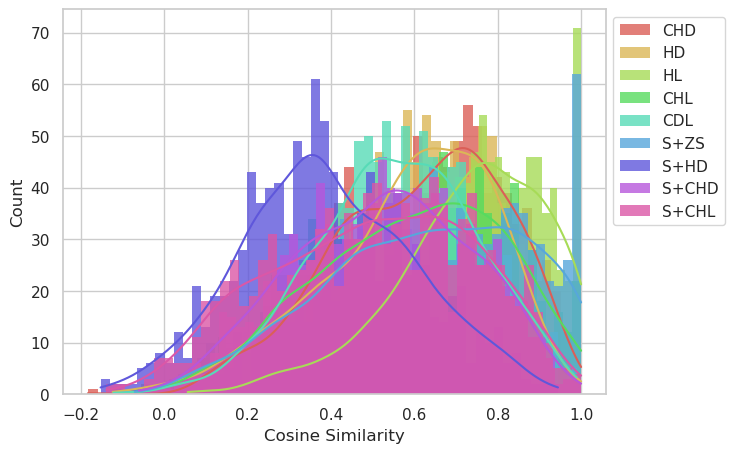

In [899]:
scores, scores_shuff = get_scores(embeddings, ds1, ds2)

plt.figure(figsize=(7, 5))
sns.set_theme(style="whitegrid", palette=sns.color_palette("hls", 9))
#colors = sns.color_palette("hls", 9)

for key, data in scores.items():
    sns.histplot(data, label=key, kde=True, bins=50, alpha=0.8, linewidth=0)

plt.xlabel("Cosine Similarity")
plt.legend()
ax = plt.gca()
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.show()

In [980]:
def compute_histogram_overlap(data1, data2):
    hist1, bins = np.histogram(data1, bins=20, density=True)
    hist2, bins2 = np.histogram(data2, bins=20, density=True)
    return np.sum(np.minimum(hist1, hist2)) * (bins[1] - bins[0])

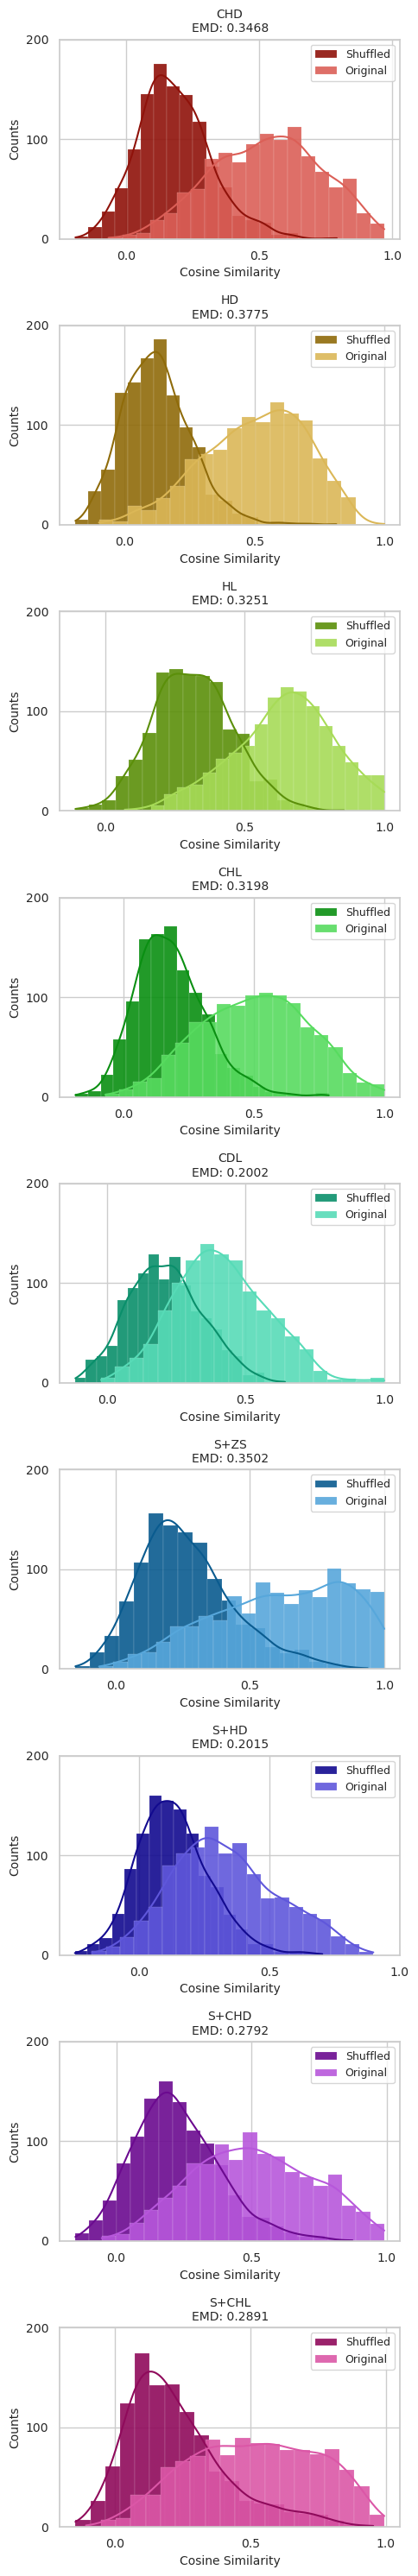

In [1222]:
scores, scores_shuff = get_scores(embeddings, ds1, ds2)

_, axes = plt.subplots(9, 1, figsize=(5, 30))
axes = axes.flatten()
sns.set_theme(style="whitegrid", palette=sns.color_palette("hls", 9))

colors = sns.color_palette("hls", 9)

for ix, (key, data) in enumerate(scores_shuff.items()):
    sns.histplot(data, ax=axes[ix], label="Shuffled", color=tuple(x - 0.3 for x in colors[ix]),
                 kde=True, bins=20, alpha=0.9, linewidth=0.1)
    
for ix, (key, data) in enumerate(scores.items()):
    sns.histplot(data, ax=axes[ix], label="Original",
                 color=colors[ix],
                 kde=True, bins=20, alpha=0.9, linewidth=0.1)
    #axes[ix].set_title(f"{key}\nOverlap: {compute_histogram_overlap(data, scores_shuff[key]):.4f}", fontsize=10)
    axes[ix].set_title(f"{key}\nEMD: {wasserstein_distance(data, scores_shuff[key]):.4f}", fontsize=10)
    axes[ix].set_xlabel("Cosine Similarity", fontsize=10)
    axes[ix].set_ylabel("Counts", fontsize=10)
    axes[ix].set_xticks([0, 0.5, 1])
    axes[ix].set_yticks([0, 100, 200])
    #axes[ix].set_ylim([0, 120])
    #axes[ix].set_xlim([0, 1])
    axes[ix].legend(fontsize=9, loc="upper right")
    axes[ix].tick_params(axis="both", labelsize=10)
    
plt.tight_layout()
plt.savefig("figs/overlaps_ft.pdf", format="pdf", bbox_inches="tight")
plt.show()

In [1376]:
def plot_hist(scores, scores_shuff, fname = "figs/overlaps_base_ft_2.pdf"):
    #_, axes = plt.subplots(3, 3, figsize=(10, 9))
    sns.set_style("white")
    _, axes = plt.subplots(9, 1, figsize=(5, 30))
    axes = axes.flatten()
    sns.set_theme(style="whitegrid", palette=sns.color_palette("hls", 9))
    colors = sns.color_palette("hls", 9)
    
    for ix, (key, data) in enumerate(scores_shuff.items()):
        sns.histplot(data, ax=axes[ix], label="Shuffled", color=tuple(x - 0.3 for x in colors[ix]),
                     kde=True, bins=20, alpha=0.9, linewidth=0.05)
        
    for ix, (key, data) in enumerate(scores.items()):
        sns.histplot(data, ax=axes[ix], label="Original",
                     color=colors[ix],
                     kde=True, bins=20, alpha=0.9, linewidth=0.05)
        #axes[ix].set_title(f"{key}\nOverlap: {compute_histogram_overlap(data, scores_shuff[key]):.4f}", fontsize=10)
        axes[ix].set_title(f"{key}\nEMD: {wasserstein_distance(data, scores_shuff[key]):.4f}", fontsize=10)
        axes[ix].set_xlabel("Cosine Similarity", fontsize=8)
        axes[ix].set_ylabel("Counts", fontsize=8)
        axes[ix].set_xticks([0, 0.5, 1])
        axes[ix].set_yticks([0, 250, 500, 750])
        axes[ix].legend(fontsize=8, loc="upper right")
        axes[ix].tick_params(axis="both", labelsize=8)
    
    plt.tight_layout()
    plt.savefig(fname, format="pdf", bbox_inches="tight")
    plt.show()

In [1161]:
from random import shuffle
v1 = np.stack(base_embed.CHD.values)
v2 = np.stack(base_embed.HL.values)
#shuffle(v2)
np.diag(cosine_similarity(v1, v2)).mean()

np.float64(0.5183767301301241)

In [1223]:
base_embed = process_csv("base_MiniLM_embeddings.csv")
ft_embed = process_csv("all-MiniLM-L12-v1_testset_only.csv")

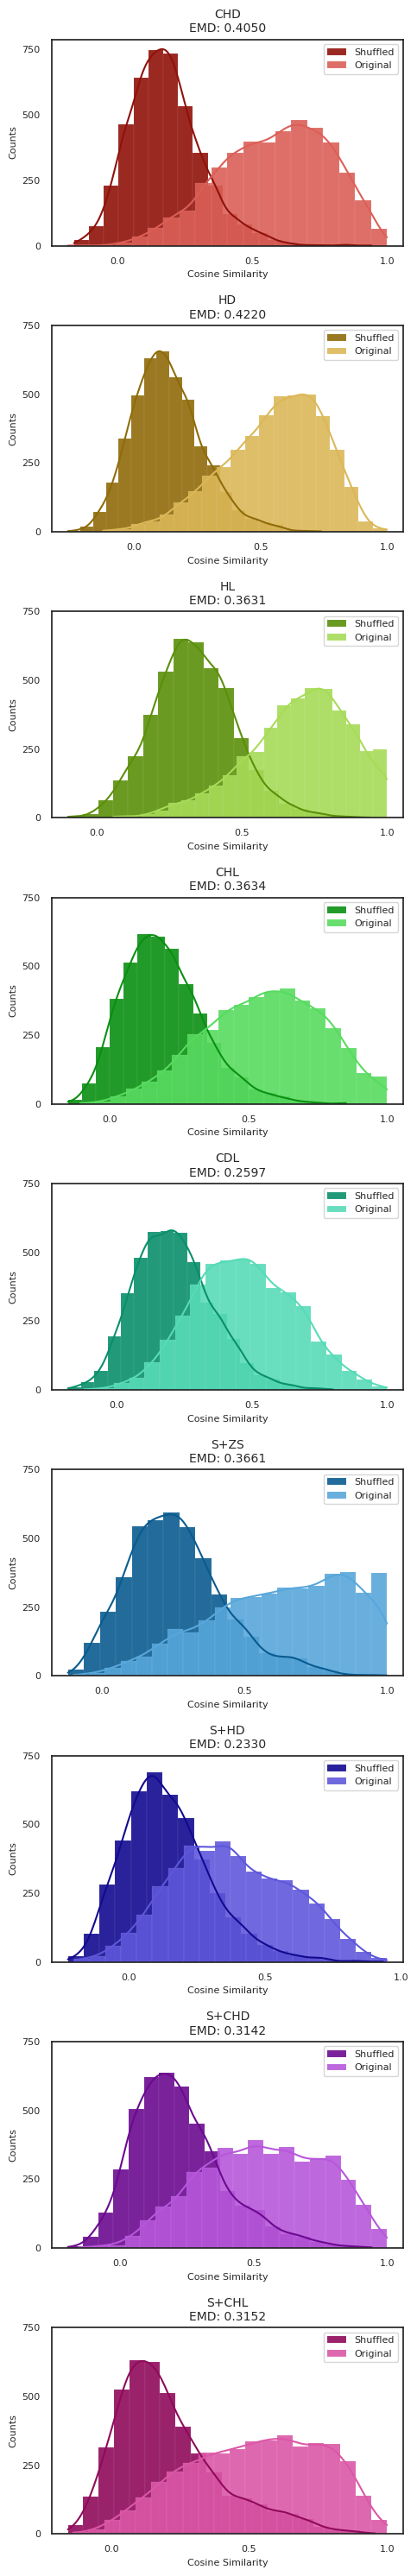

In [1372]:
scores1, scores_shuff1 = get_scores(ft_embed, "goodscents", "leffingwell")
scores2, scores_shuff2 = get_scores(ft_embed, "goodscents", "arctander")
scores3, scores_shuff3 = get_scores(ft_embed, "leffingwell", "arctander")

scores = {}
scores_shuff = {}
for col in scores1.keys():
    scores[col] = np.concatenate((scores1[col], scores2[col], scores3[col]))
    scores_shuff[col] = np.concatenate((scores_shuff1[col], scores_shuff2[col], scores_shuff3[col]))

plot_hist(scores, scores_shuff, fname = "figs/overlaps_ft.svg")

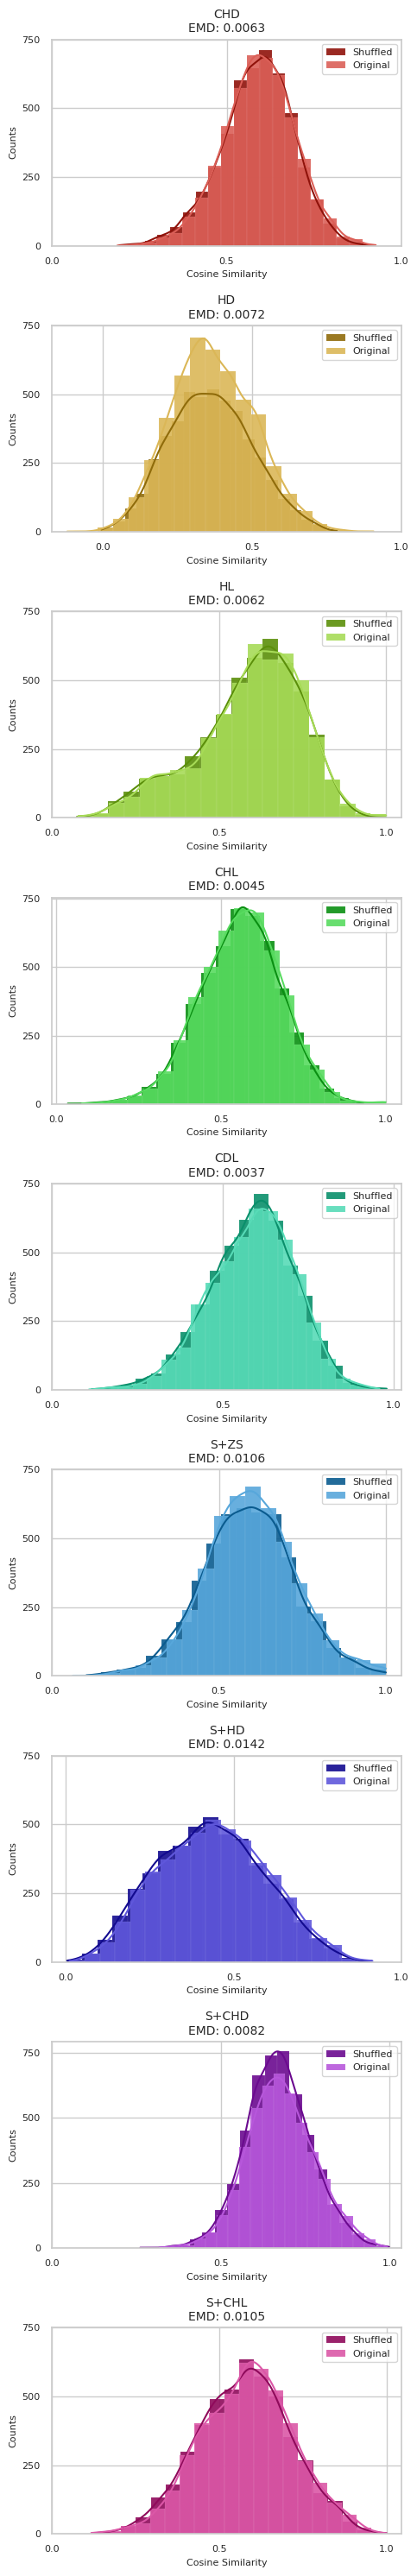

In [1229]:
scores1, scores_shuff1 = get_scores(base_df, "goodscents", "leffingwell")
scores2, scores_shuff2 = get_scores(base_df, "goodscents", "arctander")
scores3, scores_shuff3 = get_scores(base_df, "leffingwell", "arctander")

scores = {}
scores_shuff = {}
for col in scores1.keys():
    scores[col] = np.concatenate((scores1[col], scores2[col], scores3[col]))
    scores_shuff[col] = np.concatenate((scores_shuff1[col], scores_shuff2[col], scores_shuff3[col]))

plot_hist(scores, scores_shuff, fname = "figs/overlaps_base.pdf")

In [ ]:
scores1, scores_shuff1 = get_scores(embeddings, "goodscents", "leffingwell")
scores2, scores_shuff2 = get_scores(embeddings, "goodscents", "arctander")
scores3, scores_shuff3 = get_scores(embeddings, "leffingwell", "arctander")

scores = {}
scores_shuff = {}
for col in scores1.keys():
    scores[col] = np.concatenate((scores1[col], scores2[col], scores3[col]))
    scores_shuff[col] = np.concatenate((scores_shuff1[col], scores_shuff2[col], scores_shuff3[col]))

_, axes = plt.subplots(3, 3, figsize=(10, 9))
axes = axes.flatten()
sns.set_theme(style="whitegrid", palette=sns.color_palette("hls", 9))

colors = sns.color_palette("hls", 9)

for ix, (key, data) in enumerate(scores_shuff.items()):
    sns.histplot(data, ax=axes[ix], label="Shuffled", color=tuple(x - 0.3 for x in colors[ix]),
                 kde=True, bins=20, alpha=0.9, linewidth=0.05)
    
for ix, (key, data) in enumerate(scores.items()):
    sns.histplot(data, ax=axes[ix], label="Original",
                 color=colors[ix],
                 kde=True, bins=20, alpha=0.9, linewidth=0.05)
    axes[ix].set_title(f"{key}\nOverlap: {compute_histogram_overlap(data, scores_shuff[key]):.4f}", fontsize=10)
    axes[ix].set_xlabel("Cosine Similarity", fontsize=8)
    axes[ix].set_ylabel("Counts", fontsize=8)
    axes[ix].set_xticks([0, 0.5, 1])
    axes[ix].set_yticks([0, 250, 500, 750])
    axes[ix].legend(fontsize=8, loc="upper right")
    axes[ix].tick_params(axis="both", labelsize=8)

plt.tight_layout()
plt.savefig("figs/overlaps_ft_2.pdf", format="pdf", bbox_inches="tight")
plt.show()

In [1010]:
def retrieval(embed, query, k=5):
    scores = np.dot(embed, query)
    topK = np.argsort(scores)[-k:][::-1]

    return topK, scores[topK]

In [1072]:
k_range = [1, 5, 10, 20]
topk_acc = {k: {col: [] for col in plot_cols} for k in k_range}
for (ds1, ds2) in [("goodscents", "leffingwell"), ("leffingwell", "goodscents"), 
                   ("goodscents", "arctander"), ("arctander", "goodscents"), 
                   ("arctander", "leffingwell"), ("leffingwell", "arctander")]:
    df1 = embeddings.loc[embeddings.Dataset == ds1]
    df2 = embeddings.loc[embeddings.Dataset == ds2]
    cids1 = set(df1.CID.to_list())
    cids2 = set(df2.CID.to_list())
    overlap = list(cids1.intersection(cids2))
    df1 = df1.loc[embeddings.CID.isin(overlap)].sort_values(by=["CID"])
    df2 = df2.loc[embeddings.CID.isin(overlap)].sort_values(by=["CID"])

    for k in k_range:
        for col in plot_cols:
            queries = np.stack(df1["HD"].values)
            embed = np.stack(df2[col].values)
    
            acc = 0
            for ix in range(queries.shape[0]):
                topK, _ = retrieval(embed, queries[ix, :], k=k)
                if ix in topK:
                    acc += 1
            
            topk_acc[k][col].append(acc/queries.shape[0])

In [1075]:
topk_acc_CHD = {k: {col: [] for col in plot_cols} for k in k_range}
for (ds1, ds2) in [("goodscents", "leffingwell"), ("leffingwell", "goodscents"), 
                   ("goodscents", "arctander"), ("arctander", "goodscents"), 
                   ("arctander", "leffingwell"), ("leffingwell", "arctander")]:
    df1 = embeddings.loc[embeddings.Dataset == ds1]
    df2 = embeddings.loc[embeddings.Dataset == ds2]
    cids1 = set(df1.CID.to_list())
    cids2 = set(df2.CID.to_list())
    overlap = list(cids1.intersection(cids2))
    df1 = df1.loc[embeddings.CID.isin(overlap)].sort_values(by=["CID"])
    df2 = df2.loc[embeddings.CID.isin(overlap)].sort_values(by=["CID"])

    for k in k_range:
        for col in plot_cols:
            queries = np.stack(df1["CHD"].values)
            embed = np.stack(df2[col].values)
    
            acc = 0
            for ix in range(queries.shape[0]):
                topK, _ = retrieval(embed, queries[ix, :], k=k)
                if ix in topK:
                    acc += 1
            
            topk_acc_CHD[k][col].append(acc/queries.shape[0])

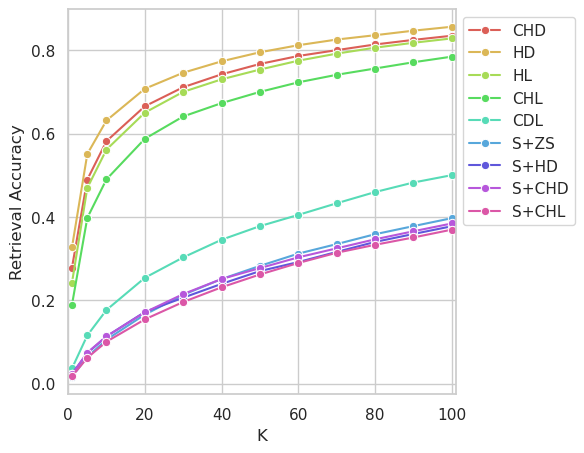

In [1074]:
plt.figure(figsize=(5,5))
colors = sns.color_palette("hls", 9)

for ix, col in enumerate(plot_cols):
    sns.lineplot(x=k_range, y=[np.array(topk_acc[k][col]).mean() for k in k_range], 
                 marker="o",
                 color=colors[ix], label=col)

plt.xlabel("K")
plt.ylabel("Retrieval Accuracy")
plt.xlim([0, 101])
plt.legend()
ax = plt.gca()
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.show()

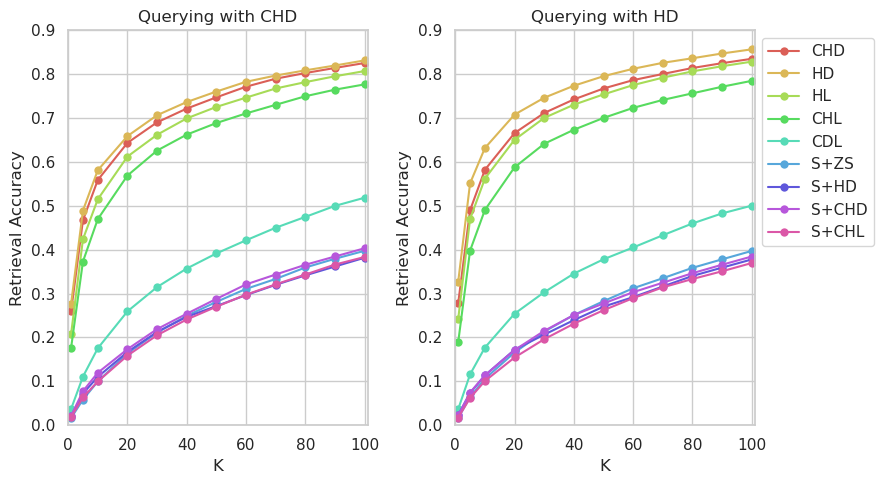

In [1087]:
_, axes= plt.subplots(1, 2, figsize=(9,5))
colors = sns.color_palette("hls", 9)

for ix, col in enumerate(plot_cols):
    sns.lineplot(ax = axes[0], x=k_range, y=[np.array(topk_acc_CHD[k][col]).mean() for k in k_range], 
                 marker="o", markeredgecolor="none",
                 color=colors[ix])
    axes[0].set_xlabel("K")
    axes[0].set_ylabel("Retrieval Accuracy")
    axes[0].set_xlim([0, 101])
    axes[0].set_ylim([0, 0.90])
    axes[0].set_title("Querying with CHD")

for ix, col in enumerate(plot_cols):
    sns.lineplot(ax = axes[1], x=k_range, y=[np.array(topk_acc[k][col]).mean() for k in k_range], 
                 marker="o", markeredgecolor="none",
                 color=colors[ix], label=col)
    axes[1].set_xlabel("K")
    axes[1].set_ylabel("Retrieval Accuracy")
    axes[1].set_xlim([0, 101])
    axes[1].set_ylim([0, 0.90])
    axes[1].set_title("Querying with HD")

plt.legend()
ax = plt.gca()
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.savefig("figs/topk.pdf", format="pdf", bbox_inches="tight")
plt.show()

In [1230]:
def topk_retrieval(embeddings):
    k_range = [1, 5, 10, 20]
    topk_acc_HD = {k: {col: [] for col in plot_cols} for k in k_range}
    for (ds1, ds2) in [("goodscents", "leffingwell"), ("leffingwell", "goodscents"), 
                       ("goodscents", "arctander"), ("arctander", "goodscents"), 
                       ("arctander", "leffingwell"), ("leffingwell", "arctander")]:
        df1 = embeddings.loc[embeddings.Dataset == ds1]
        df2 = embeddings.loc[embeddings.Dataset == ds2]
        cids1 = set(df1.CID.to_list())
        cids2 = set(df2.CID.to_list())
        overlap = list(cids1.intersection(cids2))
        df1 = df1.loc[embeddings.CID.isin(overlap)].sort_values(by=["CID"])
        df2 = df2.loc[embeddings.CID.isin(overlap)].sort_values(by=["CID"])
    
        for k in k_range:
            for col in plot_cols:
                queries = np.stack(df1["HD"].values)
                embed = np.stack(df2[col].values)
        
                acc = 0
                for ix in range(queries.shape[0]):
                    topK, _ = retrieval(embed, queries[ix, :], k=k)
                    if ix in topK:
                        acc += 1
                
                topk_acc_HD[k][col].append(acc/queries.shape[0])

    topk_acc_CHD = {k: {col: [] for col in plot_cols} for k in k_range}
    for (ds1, ds2) in [("goodscents", "leffingwell"), ("leffingwell", "goodscents"), 
                       ("goodscents", "arctander"), ("arctander", "goodscents"), 
                       ("arctander", "leffingwell"), ("leffingwell", "arctander")]:
        df1 = embeddings.loc[embeddings.Dataset == ds1]
        df2 = embeddings.loc[embeddings.Dataset == ds2]
        cids1 = set(df1.CID.to_list())
        cids2 = set(df2.CID.to_list())
        overlap = list(cids1.intersection(cids2))
        df1 = df1.loc[embeddings.CID.isin(overlap)].sort_values(by=["CID"])
        df2 = df2.loc[embeddings.CID.isin(overlap)].sort_values(by=["CID"])
    
        for k in k_range:
            for col in plot_cols:
                queries = np.stack(df1["CHD"].values)
                embed = np.stack(df2[col].values)
        
                acc = 0
                for ix in range(queries.shape[0]):
                    topK, _ = retrieval(embed, queries[ix, :], k=k)
                    if ix in topK:
                        acc += 1
                
                topk_acc_CHD[k][col].append(acc/queries.shape[0])

    return (topk_acc_HD, topk_acc_CHD)

In [1365]:
def plot_topk(topk_HD, topk_CHD, fname="figs/topk_base.pdf"):

    _, axes= plt.subplots(2, 1, figsize=(6,7))
    sns.set_style("white")
    colors = sns.color_palette("hls", 9)
    k_range = [1, 5, 10, 20]
    for ix, col in enumerate(plot_cols):
        sns.lineplot(ax = axes[0], x=k_range, y=[np.array(topk_CHD[k][col]).mean() for k in k_range], 
                     marker="o", markeredgecolor="none",
                     color=colors[ix])
        axes[0].set_xlabel("K")
        axes[0].set_ylabel("Retrieval Accuracy")
        axes[0].set_xlim([0, 21])
        axes[0].set_ylim([0, 0.80])
        axes[0].set_title("Querying with CHD")
    
    for ix, col in enumerate(plot_cols):
        sns.lineplot(ax = axes[1], x=k_range, y=[np.array(topk_HD[k][col]).mean() for k in k_range], 
                     marker="o", markeredgecolor="none",
                     color=colors[ix], label=col)
        axes[1].set_xlabel("K")
        axes[1].set_ylabel("Retrieval Accuracy")
        axes[1].set_xlim([0, 21])
        axes[1].set_ylim([0, 0.80])
        axes[1].set_title("Querying with HD")
    
    plt.legend()
    ax = plt.gca()
    sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
    plt.tight_layout()
    plt.savefig(fname, format="svg", bbox_inches="tight")
    plt.show()

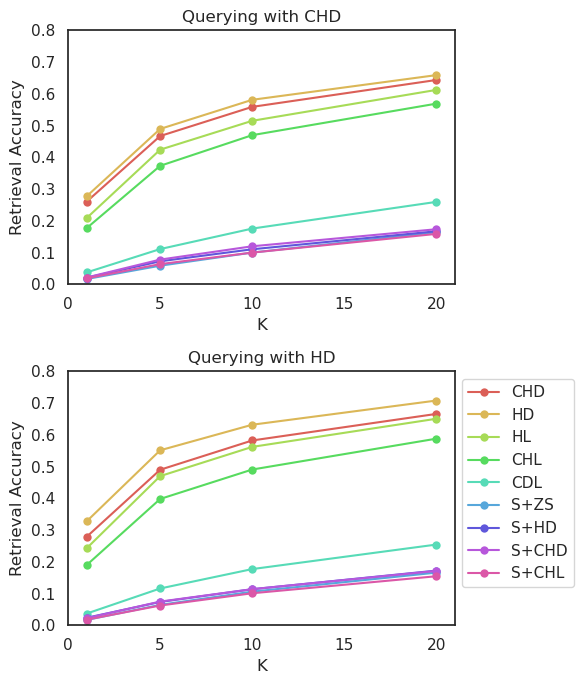

In [1366]:
(topk_HD, topk_CHD) = topk_retrieval(ft_embed)
plot_topk(topk_HD, topk_CHD, fname="figs/topk_finetuned.svg")

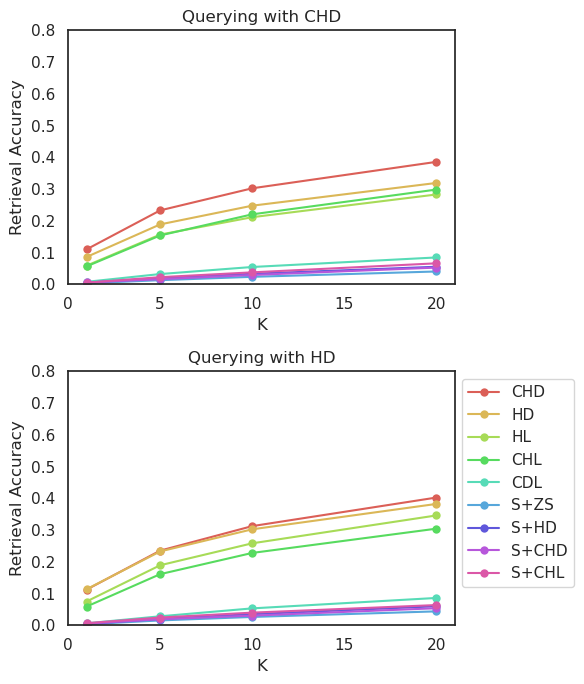

In [1367]:
(topk_HD, topk_CHD) = topk_retrieval(df)
plot_topk(topk_HD, topk_CHD, fname="figs/topk_base.svg")

In [1373]:
import pickle

#fname = "table_cosines_all-MiniLM-L12-v1.sbert_best_left_1.pkl"
fname = "embeddings_all-MiniLM-L12-v1.sbert_init_fold_1.pkl"
#fname = "embeddings_all-MiniLM-L12-v1.sbert_best_left_1_fold_1.pkl"
#fname = "table_cosines_NovaSearch.stella_en_400M_v5.sbert_best_left_1.pkl"
#fname = "table_cosines_NovaSearch.stella_en_400M_v5.sbert_init.pkl"

with open(f"/home/khue/cyrille/CIRANO/cosine_similarities/{fname}", "rb") as f:
    df = pickle.load(f)

In [1374]:
df.rename(columns={"Human descriptions": "HD",
                    "Beautified human descriptions": "CHD",
                    "Beautified human labels": "CHL",
                    "Beautified DeepNose descriptions": "CDL", 
                    "Beautified DeepNose labels": "DL",
                    "Human labels": "HL",
                    "From SMILES - zero shot": "S+ZS",
                    "From SMILES - human examples": "S+HD", 
                    "From SMILES - beautified human examples": "S+CHD", 
                    "From SMILES - beautified labels examples": "S+CHL"
                    }, inplace=True)
df = df.loc[~pd.isnull(df.index)]
df = df.reset_index()

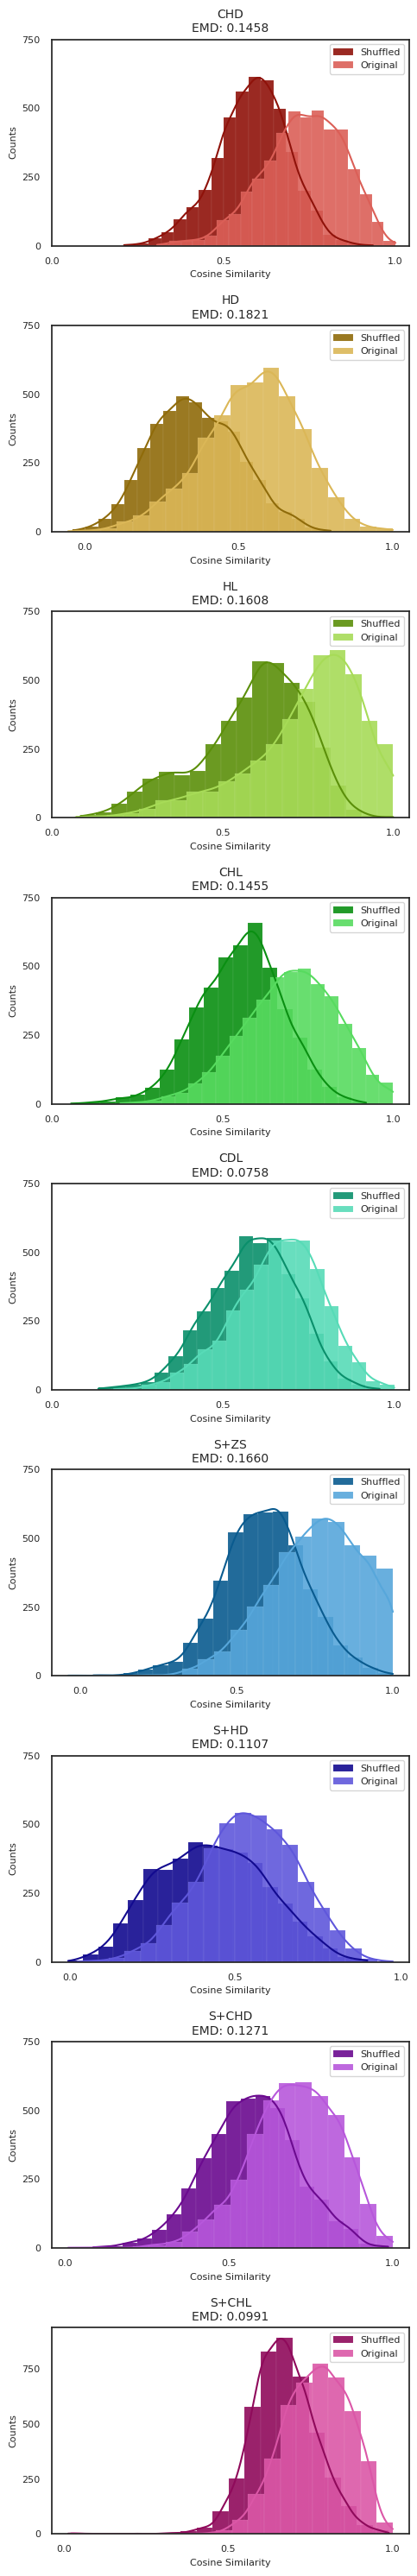

In [1377]:
scores1, scores_shuff1 = get_scores(df, "goodscents", "leffingwell")
scores2, scores_shuff2 = get_scores(df, "goodscents", "arctander")
scores3, scores_shuff3 = get_scores(df, "leffingwell", "arctander")

scores = {}
scores_shuff = {}
for col in scores1.keys():
    scores[col] = np.concatenate((scores1[col], scores2[col], scores3[col]))
    scores_shuff[col] = np.concatenate((scores_shuff1[col], scores_shuff2[col], scores_shuff3[col]))

plot_hist(scores, scores_shuff, fname = "figs/overlaps_base.pdf")

In [1421]:
import pickle

fpath = "/home/khue/cyrille/CIRANO/cosine_similarities"
fname = "table_cosines_all-MiniLM-L12-v1.sbert_best_left_1.pkl"
fname = "table_cosines_all-MiniLM-L12-v1.sbert_init.pkl"
#fname = "embeddings_all-MiniLM-L12-v1.sbert_init_fold_1.pkl"
#fname = "embeddings_all-MiniLM-L12-v1.sbert_best_left_1_fold_1.pkl"
#fname = "table_cosines_NovaSearch.stella_en_400M_v5.sbert_best_left_1.pkl"
#fname = "table_cosines_NovaSearch.stella_en_400M_v5.sbert_init.pkl"

for fn in ["table_cosines_all-MiniLM-L12-v1.sbert_best_left_1.pkl", 
           "table_cosines_all-MiniLM-L12-v1.sbert_init.pkl", 
          "table_cosines_NovaSearch.stella_en_400M_v5.sbert_best_left_1.pkl", 
           "table_cosines_NovaSearch.stella_en_400M_v5.sbert_init.pkl"]:
    print(f"file: {fn}")
    with open(f"{fpath}/{fn}", "rb") as f:
        df = pickle.load(f)

        for ix in df.index:
            scores = []
            for iy in range(1, 6):
                scores.extend(df[iy][ix])
        
            scores = np.array(scores)
        
            print(f"{ix}: mean {scores.mean():0.8f} std {scores.std()/np.sqrt(scores.size):0.8f}")
        
            bs = []
            for i in range(100):
                sample = np.random.choice(scores, size=scores.size)
                bs.append(sample.mean())
        
            
            print(f"bootstrap std: {np.array(bs).std():.8f}")

file: table_cosines_all-MiniLM-L12-v1.sbert_best_left_1.pkl
Beautified human descriptions: mean 0.58437899 std 0.00307127
bootstrap std: 0.00298517
Human descriptions: mean 0.53380438 std 0.00295454
bootstrap std: 0.00312307
Human labels: mean 0.47707872 std 0.00248499
bootstrap std: 0.00235883
Beautified human labels: mean 0.53371712 std 0.00298863
bootstrap std: 0.00281390
Beautified DeepNose descriptions: mean 0.40714799 std 0.00284899
bootstrap std: 0.00250174
Beautified DeepNose labels: mean 0.37739101 std 0.00247772
bootstrap std: 0.00242549
From SMILES - zero shot: mean 0.32956522 std 0.00264681
bootstrap std: 0.00276925
From SMILES - human examples: mean 0.29357218 std 0.00280005
bootstrap std: 0.00272267
From SMILES - beautified human examples: mean 0.32006009 std 0.00273969
bootstrap std: 0.00252020
From SMILES - beautified labels examples: mean 0.34625202 std 0.00281572
bootstrap std: 0.00275371
file: table_cosines_all-MiniLM-L12-v1.sbert_init.pkl
Beautified human descriptio

In [1414]:
for ix in df.index:
    scores = []
    for iy in range(1, 6):
        scores.extend(df[iy][ix])

    scores = np.array(scores)

    print(f"{ix}: mean {scores.mean():0.4f} std {scores.std()/np.sqrt(scores.size):0.4f}")

    bs = []
    for i in range(100):
        sample = np.random.choice(scores, size=scores.size)
        bs.append(sample.mean())

    
    print(f"bootstrap std: {np.array(bs).std():.4f}")

Beautified human descriptions: mean 0.7304 std 0.0018
bootstrap std: 0.0017
Human descriptions: mean 0.5589 std 0.0023
bootstrap std: 0.0022
Human labels: mean 0.4278 std 0.0017
bootstrap std: 0.0017
Beautified human labels: mean 0.6868 std 0.0019
bootstrap std: 0.0018
Beautified DeepNose descriptions: mean 0.6321 std 0.0019
bootstrap std: 0.0020
Beautified DeepNose labels: mean 0.4053 std 0.0015
bootstrap std: 0.0015
From SMILES - zero shot: mean 0.5764 std 0.0018
bootstrap std: 0.0018
From SMILES - human examples: mean 0.4980 std 0.0022
bootstrap std: 0.0019
From SMILES - beautified human examples: mean 0.5925 std 0.0018
bootstrap std: 0.0018
From SMILES - beautified labels examples: mean 0.6609 std 0.0015
bootstrap std: 0.0015


In [1401]:
scores.mean()
scores.std()/np.sqrt(scores.size)

np.float64(0.001521549585100072)

In [1411]:
np.random.choice([1, 2, 3], size=3)

array([1, 3, 1])